# Airbnb Data Analysis
## Comprehensive Exploratory Data Analysis

---

## Table of Contents

| Section | Description | Jump To |
|---------|-------------|---------|
| **Overview** | Project objectives and research questions | [View](#overview) |
| **Step 1** | Import Required Libraries | [View](#step1) |
| **Step 2** | Load the Dataset | [View](#step2) |
| **Step 3** | Data Exploration | [View](#step3) |
| **Step 4** | Data Cleaning | [View](#step4) |
| **Question 1** | Property Types Analysis | [View](#q1) |
| **Question 2** | Top Neighborhoods by Listings | [View](#q2) |
| **Question 3** | Expensive Areas Analysis | [View](#q3) |
| **Step 5** | Price Analysis | [View](#step5) |
| **Question 4** | Construction Year vs Price | [View](#q4) |
| **Question 5** | Top Hosts by Listing Count | [View](#q5) |
| **Question 6** | Verified Hosts Analysis | [View](#q6) |
| **Question 7** | Price vs Service Fee Correlation | [View](#q7) |
| **Question 8** | Review Rates by Location & Type | [View](#q8) |
| **Question 9** | Host Availability Analysis | [View](#q9) |
| **Summary** | Key Findings & Conclusions | [View](#summary) |

---

<a id="overview"></a>

## Project Overview

> **Objective:** Perform comprehensive Exploratory Data Analysis (EDA) on Airbnb Open Data to uncover insights about property listings, pricing strategies, host behaviors, and customer reviews.

### Research Questions

**Property & Location Analysis**
- What are different property types in the dataset?
- Which neighborhood group has the highest number of listings?
- Which neighborhoods have the highest average prices?

**Pricing & Economics**
- Is there a relationship between construction year and price?
- Is there a correlation between price and service fee?

**Host Performance**
- Who are the top 10 hosts by listing count?
- Are verified hosts more likely to receive positive reviews?
- Are hosts with more listings more available throughout the year?

**Reviews & Ratings**
- What is the average review rate by neighbourhood and room type?

---

### Dataset Information

| Property | Detail |
|----------|--------|
| **Source File** | `1730285881-Airbnb_Open_Data.xlsx` |
| **Format** | Microsoft Excel Workbook |
| **Type** | Airbnb Listing Data |
| **Method** | Exploratory Data Analysis (EDA) |
| **Tools** | pandas, numpy, matplotlib, seaborn |

---

<a id="step1"></a>

---

## Step 1: Import Required Libraries

### Objective
Import all necessary Python libraries for data manipulation, analysis, and visualization.

---

### Libraries Used

| Library | Purpose | Key Functions |
|---------|---------|---------------|
| **pandas** | Data manipulation & analysis | `read_excel()`, `DataFrame()`, `groupby()` |
| **numpy** | Numerical operations | Array operations, mathematical functions |
| **matplotlib** | Basic plotting & visualization | `plt.plot()`, `plt.bar()`, `plt.scatter()` |
| **seaborn** | Statistical visualizations | `sns.boxplot()`, `sns.heatmap()` |

---

### Why These Libraries?

> **Lightweight & Universal** - Works in local Jupyter, cloud JupyterLite, and everywhere!
>
> **Beginner-Friendly** - Simple, well-documented APIs that are easy to learn
>
> **Industry Standard** - Used by data scientists worldwide for professional analysis

---

In [27]:
import pandas as pd                  # Load pandas for Excel/CSV handling
import numpy as np                   # Load numpy for numerical operations
import matplotlib.pyplot as plt      # Load matplotlib for charts
import seaborn as sns                # Load seaborn for beautiful plots

plt.style.use('ggplot')             # Set clean visualization style
sns.set_palette("husl")             # Apply harmonious color palette

print("Libraries loaded successfully!")

Libraries loaded successfully!


<a id="step2"></a>

---

## Step 2: Load the Data

### Objective
Load the Airbnb dataset from Excel file into a pandas DataFrame for analysis.

---

### What the Code Does

| Step | Code | Action |
|------|------|--------|
| **1** | `pd.read_excel(...)` | Reads Excel file into DataFrame |
| **2** | `df.shape` | Gets dimensions (rows × columns) |
| **3** | `df.head()` | Shows first 5 rows as preview |

---

### Expected Output

> **Confirmation Message** - `Dataset loaded: X rows, Y columns`
>
> **Data Preview** - First 5 records with all columns displayed

---

### Important Note

> The Excel file **must** be in the same directory as this notebook.  
> If it's in a different location, provide the full file path.

**Examples:**
- Same folder: `'1730285881-Airbnb_Open_Data.xlsx'`
- Different folder: `'C:/Data/1730285881-Airbnb_Open_Data.xlsx'`

---

In [28]:
# Load the data
df = pd.read_excel('1730285881-Airbnb_Open_Data.xlsx')

print(f"Dataset loaded: {df.shape[0]} rows, {df.shape[1]} columns")
df.head()

Dataset loaded: 102599 rows, 26 columns


,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,124.0,3.0,0.0,NaT,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,74.0,30.0,270.0,2019-07-05,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


<a id="step3"></a>

---

## Step 3: Basic Data Exploration

### Objective
Understand the structure, content, and basic statistics of our dataset.

---

### Three Essential Checks

| Check | Function | What It Tells Us |
|-------|----------|------------------|
| **Column Names** | `df.columns.tolist()` | Lists all column names in the dataset |
| **Data Info** | `df.info()` | Shows data types, non-null counts, memory usage |
| **Statistics** | `df.describe()` | Provides mean, median, min, max for numeric columns |

---

### What Each Code Cell Does

**Cell 1: Column Names**
```python
df.columns.tolist()
```
- **Purpose:** See all available fields in our dataset  
- **Output:** List like `['price', 'neighborhood', 'room_type', ...]`

**Cell 2: Dataset Info**
```python
df.info()
```
- **Purpose:** Check data types and identify missing values  
- **Output:** Summary table with column names, data types, and non-null counts

**Cell 3: Statistical Summary**
```python
df.describe()
```
- **Purpose:** Get statistical overview of numeric columns  
- **Output:** Table with count, mean, std, min, 25%, 50%, 75%, max

---

> **Pro Tip:** Pay attention to data types! Prices stored as text (object) need conversion before mathematical operations.

---

In [4]:
# Check column names
print("Columns in dataset:")
print(df.columns.tolist())

Columns in dataset:
,['id', 'NAME', 'host id', 'host_identity_verified', 'host name', 'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country', 'country code', 'instant_bookable', 'cancellation_policy', 'room type', 'Construction year', 'price', 'service fee', 'minimum nights', 'number of reviews', 'last review', 'reviews per month', 'review rate number', 'calculated host listings count', 'availability 365', 'house_rules', 'license']


In [29]:
# Basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102599 non-null  int64         
 1   NAME                            102329 non-null  object        
 2   host id                         102599 non-null  int64         
 3   host_identity_verified          102310 non-null  object        
 4   host name                       102191 non-null  object        
 5   neighbourhood group             102570 non-null  object        
 6   neighbourhood                   102583 non-null  object        
 7   lat                             102591 non-null  float64       
 8   long                            102591 non-null  float64       
 9   country                         102067 non-null  object        
 10  country code                    102468 non-null  object 

In [30]:
# Statistical summary
df.describe()

,id,host id,lat,long,instant_bookable,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
count,1.025990e+05,1.025990e+05,102591.000000,102591.000000,102494.000000,102385.000000,102352.000000,102326.000000,102190.000000,102416.000000,86706,86720.000000,102273.000000,102280.000000,102151.000000
mean,2.914623e+07,4.925411e+10,40.728094,-73.949644,0.497785,2012.487464,625.293536,125.026924,8.135845,27.483743,2019-06-12 03:40:52.065601024,1.374022,3.279106,7.936605,141.133254
min,1.001254e+06,1.236005e+08,40.499790,-74.249840,0.000000,2003.000000,50.000000,10.000000,-1223.000000,0.000000,2012-07-11 00:00:00,0.010000,1.000000,1.000000,-10.000000
25%,1.508581e+07,2.458333e+10,40.688740,-73.982580,0.000000,2007.000000,340.000000,68.000000,2.000000,1.000000,2018-10-28 00:00:00,0.220000,2.000000,1.000000,3.000000
50%,2.913660e+07,4.911774e+10,40.722290,-73.954440,0.000000,2012.000000,624.000000,125.000000,3.000000,7.000000,2019-06-14 00:00:00,0.740000,3.000000,1.000000,96.000000
75%,4.320120e+07,7.399650e+10,40.762760,-73.932350,1.000000,2017.000000,913.000000,183.000000,5.000000,30.000000,2019-07-05 00:00:00,2.000000,4.000000,2.000000,269.000000
max,5.736742e+07,9.876313e+10,40.916970,-73.705220,1.000000,2022.000000,1200.000000,240.000000,5645.000000,1024.000000,2058-06-16 00:00:00,90.000000,5.000000,332.000000,3677.000000
std,1.625751e+07,2.853900e+10,0.055857,0.049521,0.499998,5.765556,331.671614,66.325739,30.553781,49.508954,NaN,1.746621,1.284657,32.218780,135.435024


<a id="step4"></a>

---

## Step 4: Data Cleaning

### Objective
Identify and handle missing values, and fix data types for analysis.

---

### What We're Doing

| Task | Method | Purpose |
|------|--------|---------|
| **Check Missing Values** | `df.isnull().sum()` | Count null values in each column |
| **Calculate Percentage** | `(missing / len(df)) * 100` | Understand severity of missing data |
| **Visualize** | `plt.barh()` | See top columns with missing data |

---

### Understanding the Output

> **Missing Values Table** - Shows columns with missing data, sorted by count
>
> **Bar Chart** - Visual representation of top 15 columns with missing percentages

---

In [31]:
# Check missing values
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100
missing_df = pd.DataFrame({'Missing': missing, 'Percentage': missing_pct})
missing_df = missing_df[missing_df['Missing'] > 0].sort_values('Missing', ascending=False)

print("Columns with missing values:")
print(missing_df)

Columns with missing values:
                                Missing  Percentage
license                          102597   99.998051
house_rules                       54843   53.453737
last review                       15893   15.490404
reviews per month                 15879   15.476759
country                             532    0.518524
availability 365                    448    0.436651
minimum nights                      409    0.398639
host name                           408    0.397665
review rate number                  326    0.317742
calculated host listings count      319    0.310919
host_identity_verified              289    0.281679
service fee                         273    0.266084
NAME                                270    0.263160
price                               247    0.240743
Construction year                   214    0.208579
number of reviews                   183    0.178364
country code                        131    0.127682
instant_bookable                   

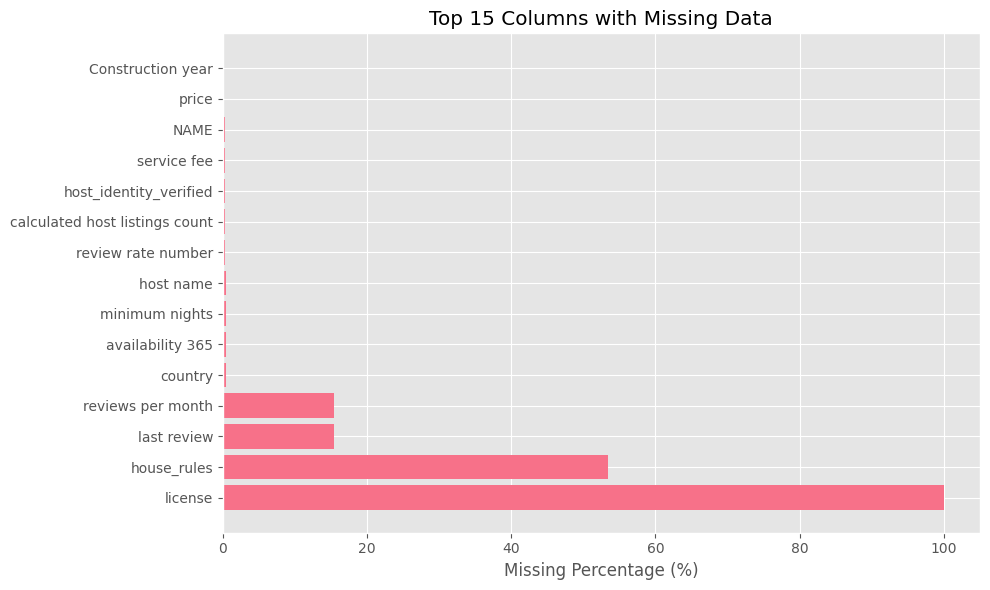

In [32]:
# Visualize missing data
plt.figure(figsize=(10, 6))
top_missing = missing_df.head(15)
plt.barh(top_missing.index, top_missing['Percentage'])
plt.xlabel('Missing Percentage (%)')
plt.title('Top 15 Columns with Missing Data')
plt.tight_layout()
plt.show()

<a id="q1"></a>

---

## Question 1: Property Types in Dataset

### Research Question
**What are different property types in the Dataset?**

---

### Approach

1. **Find Room/Property Type Column** - Search for columns containing "room" and "type"
2. **Count Each Type** - Use `value_counts()` to get distribution
3. **Visualize** - Create bar chart showing property type distribution

---

### Expected Insights

> - Entire home/apartment
> - Private room
> - Shared room
> - Hotel room

---

Property/Room Types (room type):
room type
Entire home/apt    53701
Private room       46556
Shared room         2226
Hotel room           116
Name: count, dtype: int64


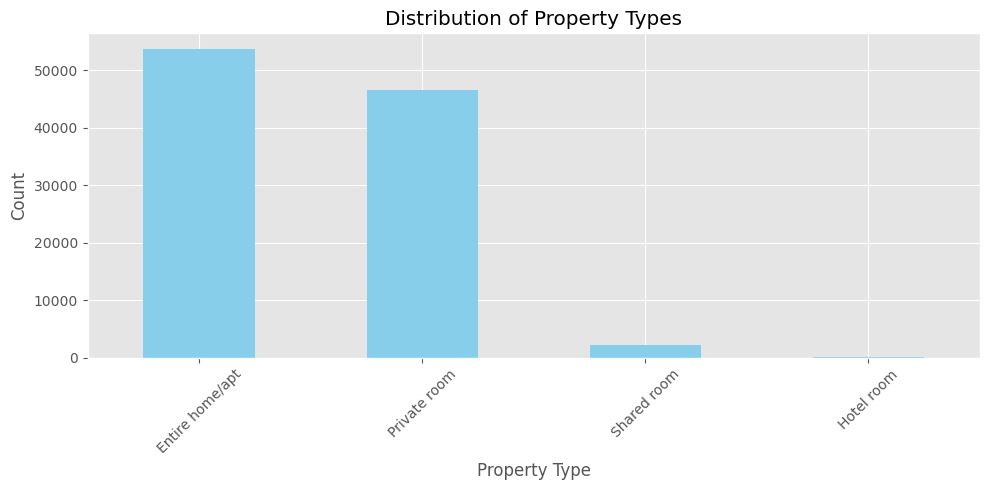

In [33]:
# Find room type column (may have different names)
room_col = None
for col in df.columns:
    if 'room' in col.lower() and 'type' in col.lower():
        room_col = col
        break

if room_col:
    room_types = df[room_col].value_counts()
    print(f"Property/Room Types ({room_col}):")
    print(room_types)
    
    # Visualize
    plt.figure(figsize=(10, 5))
    room_types.plot(kind='bar', color='skyblue')
    plt.title('Distribution of Property Types')
    plt.xlabel('Property Type')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("Room type column not found")

<a id="q2"></a>

---

## Question 2: Top Neighborhoods by Listings

### Research Question
**Which neighborhood group has the highest number of listings?**

---

### Approach

1. **Locate Neighborhood Column** - Search for "neighbourhood" or "neighborhood"
2. **Count Listings** - Count occurrences per neighborhood
3. **Get Top 10** - Sort and select top 10 neighborhoods
4. **Visualize** - Create horizontal bar chart

---

### What This Tells Us

> **Popular Areas** - Neighborhoods with high listing density
>
> **Market Concentration** - Where hosts focus their properties
>
> **Tourist Hotspots** - Areas with most Airbnb activity

---

Top Neighborhoods (neighbourhood group):
neighbourhood group
Manhattan        43792
Brooklyn         41842
Queens           13267
Bronx             2712
Staten Island      955
brookln              1
manhatan             1
Name: count, dtype: int64


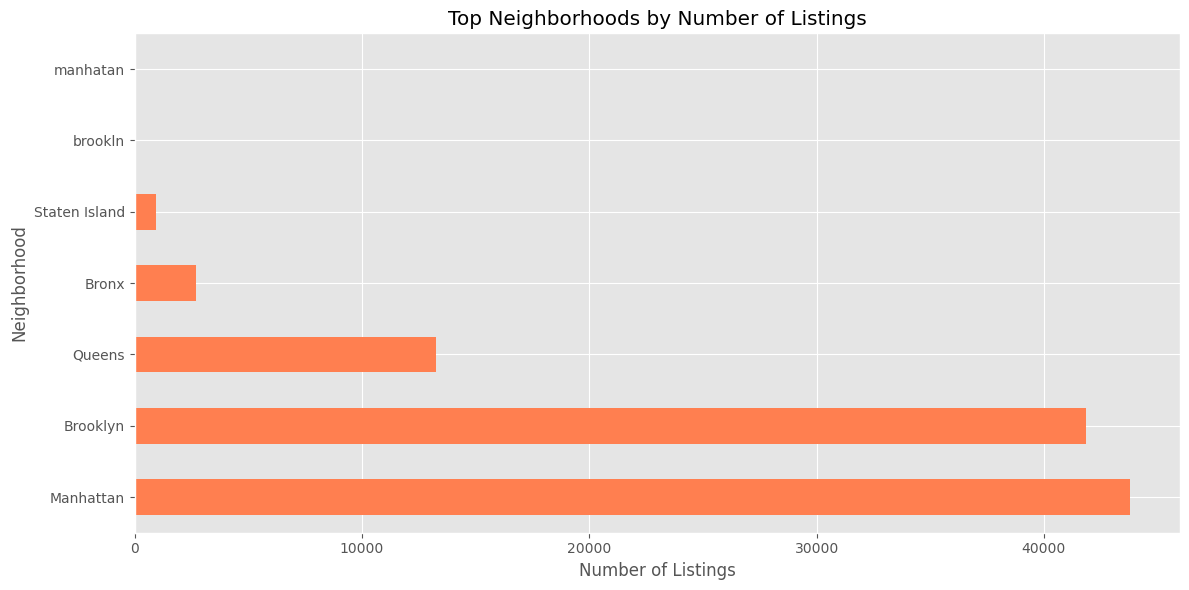

In [45]:
# Find neighborhood column
neigh_col = None
for col in df.columns:
    if 'neighbourhood' in col.lower() or 'neighborhood' in col.lower():
        neigh_col = col
        break

if neigh_col:
    neighborhood_counts = df[neigh_col].value_counts().head(10)
    print(f"Top Neighborhoods ({neigh_col}):")
    print(neighborhood_counts)
    
    # Visualize
    plt.figure(figsize=(12, 6))
    neighborhood_counts.plot(kind='barh', color='coral')
    plt.title('Top Neighborhoods by Number of Listings')
    plt.xlabel('Number of Listings')
    plt.ylabel('Neighborhood')
    plt.tight_layout()
    plt.show()
else:
    print("Neighborhood column not found")

<a id="q3"></a>

---

## Question 3: Expensive Areas Analysis

### Research Question
**Which neighborhoods have the highest average prices?**

---

### Approach

| Step | Action |
|------|--------|
| **1. Data Cleaning** | Remove $ signs and commas from price column |
| **2. Type Conversion** | Convert price to numeric format |
| **3. Group & Calculate** | Group by neighborhood and calculate mean price |
| **4. Sort & Select** | Get top 10 most expensive neighborhoods |
| **5. Visualize** | Create horizontal bar chart |

---

### Business Value

> **Pricing Strategy** - Understand premium market areas
>
> **Investment Decisions** - Identify high-value locations
>
> **Competitive Analysis** - Compare neighborhood pricing tiers

---

Top 7 Neighborhoods by Average Price:
neighbourhood
New Dorp                  1045.000000
Chelsea, Staten Island    1042.000000
Fort Wadsworth            1024.000000
Little Neck                817.750000
Jamaica Hills              812.904762
Arden Heights              804.888889
Midland Beach              796.176471
Shore Acres                792.260870
Mill Basin                 775.142857
Riverdale                  768.736842
Name: price, dtype: float64


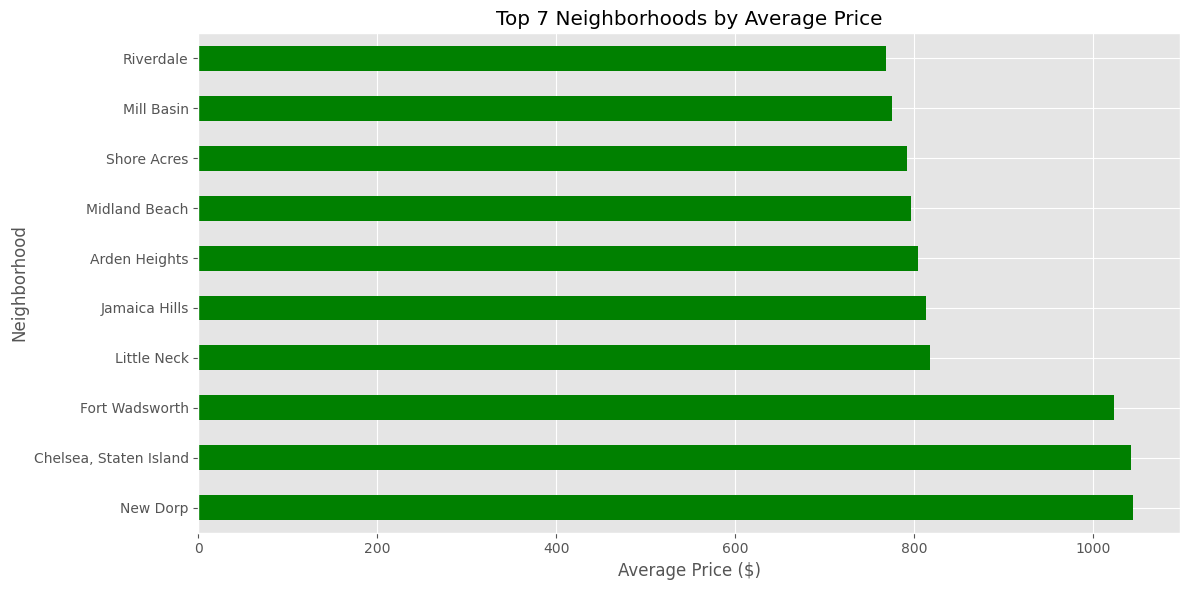

In [43]:
# Find price column
price_col = None
for col in df.columns:
    if 'price' in col.lower():
        price_col = col
        break

if price_col and neigh_col:
    # Convert price to numeric (remove $ and commas)
    df[price_col] = df[price_col].astype(str).str.replace('$', '').str.replace(',', '')
    df[price_col] = pd.to_numeric(df[price_col], errors='coerce')
    
    # Calculate average price by neighborhood
    avg_price = df.groupby(neigh_col)[price_col].mean().sort_values(ascending=False).head(10)
    print("Top 7 Neighborhoods by Average Price:")
    print(avg_price)
    
    # Visualize
    plt.figure(figsize=(12, 6))
    avg_price.plot(kind='barh', color='green')
    plt.title('Top 7 Neighborhoods by Average Price')
    plt.xlabel('Average Price ($)')
    plt.ylabel('Neighborhood')
    plt.tight_layout()
    plt.show()
else:
    print("Price or neighborhood column not found")

<a id="step5"></a>

---

## Step 5: Price Analysis

### Objective
Explore the price distribution in detail using statistical and visual methods.

---

### Analysis Components

**1. Price Distribution Histogram**
- Shows frequency of different price ranges
- Identifies most common price points

**2. Price Boxplot**
- Reveals outliers and extreme values
- Shows median, quartiles, and range

---

### Statistical Metrics

| Metric | What It Tells Us |
|--------|------------------|
| **Mean** | Average price across all listings |
| **Median (50%)** | Middle value, less affected by outliers |
| **Std** | Price variability/spread |
| **Min/Max** | Price range extremes |

---

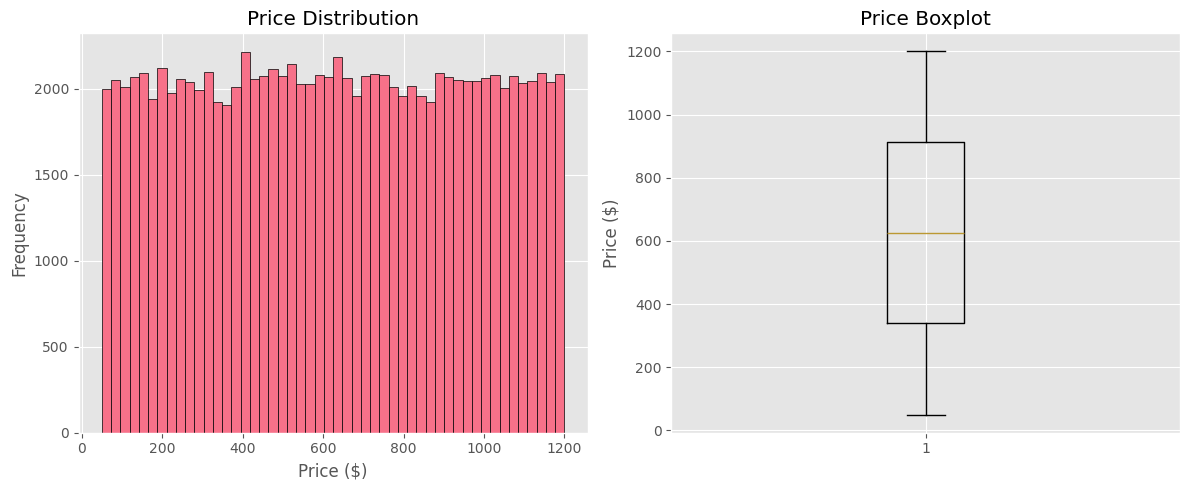

Price Statistics:
count    102352.000000
mean        625.293536
std         331.671614
min          50.000000
25%         340.000000
50%         624.000000
75%         913.000000
max        1200.000000
Name: price, dtype: float64


In [36]:
if price_col:
    # Price distribution
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.hist(df[price_col].dropna(), bins=50, edgecolor='black')
    plt.title('Price Distribution')
    plt.xlabel('Price ($)')
    plt.ylabel('Frequency')
    
    plt.subplot(1, 2, 2)
    plt.boxplot(df[price_col].dropna())
    plt.title('Price Boxplot')
    plt.ylabel('Price ($)')
    
    plt.tight_layout()
    plt.show()
    
    print(f"Price Statistics:")
    print(df[price_col].describe())

<a id="q4"></a>

---

## Question 4: Construction Year vs Price

### Research Question
**Is there a relationship between construction year and price?**

---

### Analysis Method

**Correlation Analysis**
- Remove outliers and invalid data (years outside 1800-2025, extreme prices)
- Scatter plot to visualize relationship
- Pearson correlation coefficient to measure strength
- Decade-based analysis for clearer trends

---

### Data Cleaning Steps

1. **Remove invalid construction years** - Filter years between 1800 and 2025
2. **Remove price outliers** - Keep only bottom 95% to avoid skewing
3. **Convert price to numeric** - Clean $ signs and commas
4. **Group by decade** - Analyze trends over time periods

---

### Interpreting Correlation

| Correlation Value | Interpretation |
|-------------------|----------------|
| **+0.7 to +1.0** | Strong positive relationship |
| **+0.3 to +0.7** | Moderate positive relationship |
| **-0.3 to +0.3** | Weak or no relationship |
| **-0.7 to -0.3** | Moderate negative relationship |
| **-1.0 to -0.7** | Strong negative relationship |

---

> **Hypothesis:** Newer properties may command higher prices due to modern amenities and better condition.

---

Analyzing 97107 listings after data cleaning
Construction year range: 2003 to 2022
Price range: $50 to $1143


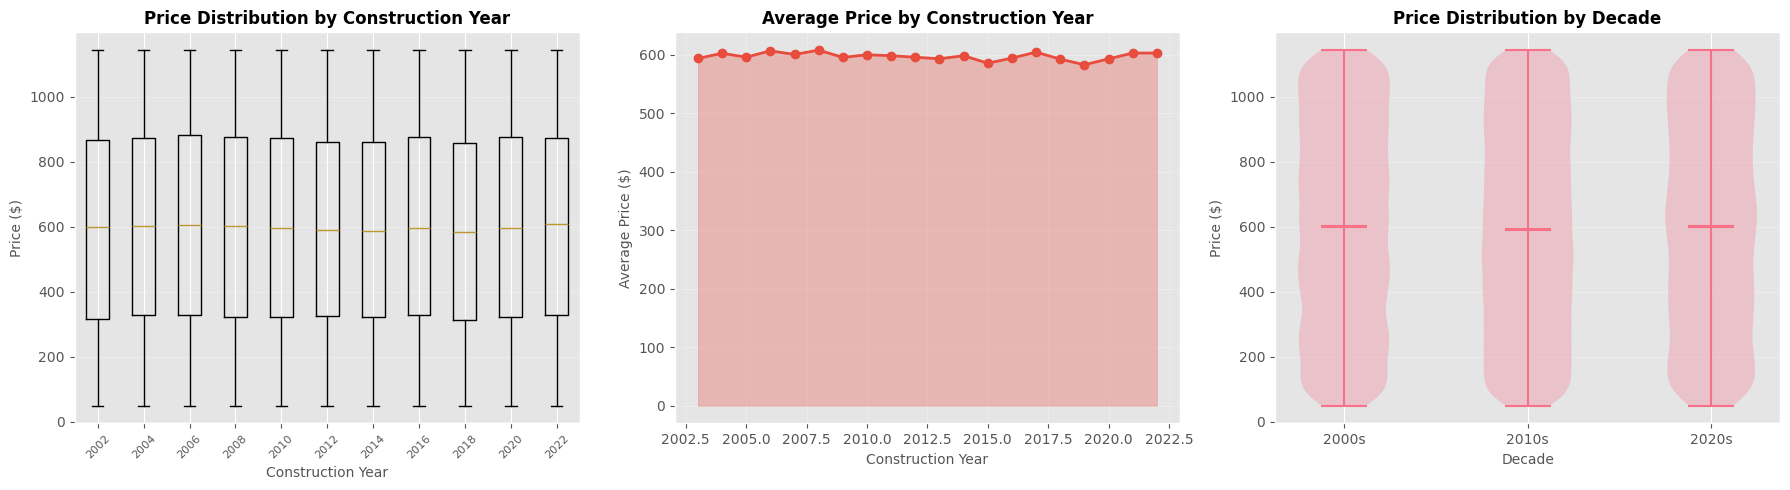


CORRELATION ANALYSIS
Correlation coefficient: -0.005
✓ Weak/No relationship: Construction year doesn't significantly affect price
  Insight: Other factors (location, amenities, size) matter more than age

PRICE STATISTICS BY DECADE
Decade     Avg Price    Median       Count     
------------------------------------------------------------
2000s       $600.05      $603.00      34,209    
2010s       $594.20      $591.00      48,337    
2020s       $599.24      $602.00      14,561    

KEY FINDING
Price variation across construction years: $25.01
This represents a 4.2% difference
→ Construction year has minimal impact on pricing
→ Location and amenities are likely more important factors


In [38]:
# Find construction year column
year_col = None
for col in df.columns:
    if 'construction' in col.lower() and 'year' in col.lower():
        year_col = col
        break

# Find price column
price_col = None
for col in df.columns:
    if 'price' in col.lower() and 'service' not in col.lower():
        price_col = col
        break

if year_col and price_col:
    # Create a copy to work with
    temp_df = df[[year_col, price_col]].copy()
    
    # Convert price to numeric (remove $ and commas)
    temp_df[price_col] = temp_df[price_col].astype(str).str.replace('$', '').str.replace(',', '')
    temp_df[price_col] = pd.to_numeric(temp_df[price_col], errors='coerce')
    
    # Remove missing values and outliers
    temp_df = temp_df.dropna()
    
    # Filter reasonable construction years (between 1800 and 2025)
    temp_df = temp_df[(temp_df[year_col] >= 1800) & (temp_df[year_col] <= 2025)]
    
    # Filter reasonable prices (remove extreme outliers)
    price_95th = temp_df[price_col].quantile(0.95)
    temp_df = temp_df[temp_df[price_col] <= price_95th]
    
    print(f"Analyzing {len(temp_df)} listings after data cleaning")
    print(f"Construction year range: {temp_df[year_col].min():.0f} to {temp_df[year_col].max():.0f}")
    print(f"Price range: ${temp_df[price_col].min():.0f} to ${temp_df[price_col].max():.0f}")
    
    # Create comprehensive visualization with 3 subplots
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    
    # 1. Box plot by year - shows distribution better than scatter
    temp_df['year_group'] = (temp_df[year_col] // 2) * 2  # Group by 2-year intervals
    year_groups = sorted(temp_df['year_group'].unique())
    
    # Prepare data for boxplot
    box_data = [temp_df[temp_df['year_group'] == year][price_col].values for year in year_groups]
    
    axes[0].boxplot(box_data, labels=[f"{int(y)}" for y in year_groups], showfliers=False)
    axes[0].set_title('Price Distribution by Construction Year', fontsize=12, fontweight='bold')
    axes[0].set_xlabel('Construction Year', fontsize=10)
    axes[0].set_ylabel('Price ($)', fontsize=10)
    axes[0].tick_params(axis='x', rotation=45, labelsize=8)
    axes[0].grid(True, alpha=0.3, axis='y')
    
    # 2. Average price by year - shows trend clearly
    year_avg = temp_df.groupby(year_col)[price_col].mean().sort_index()
    
    axes[1].plot(year_avg.index, year_avg.values, marker='o', linewidth=2, markersize=6, color='#e74c3c')
    axes[1].fill_between(year_avg.index, year_avg.values, alpha=0.3, color='#e74c3c')
    axes[1].set_title('Average Price by Construction Year', fontsize=12, fontweight='bold')
    axes[1].set_xlabel('Construction Year', fontsize=10)
    axes[1].set_ylabel('Average Price ($)', fontsize=10)
    axes[1].grid(True, alpha=0.3)
    
    # 3. Violin plot for decade comparison
    temp_df['decade'] = (temp_df[year_col] // 10) * 10
    decades = sorted(temp_df['decade'].unique())
    
    parts = axes[2].violinplot([temp_df[temp_df['decade'] == d][price_col].values for d in decades],
                                positions=range(len(decades)),
                                showmeans=True,
                                showmedians=True)
    
    axes[2].set_xticks(range(len(decades)))
    axes[2].set_xticklabels([f"{int(d)}s" for d in decades])
    axes[2].set_title('Price Distribution by Decade', fontsize=12, fontweight='bold')
    axes[2].set_xlabel('Decade', fontsize=10)
    axes[2].set_ylabel('Price ($)', fontsize=10)
    axes[2].grid(True, alpha=0.3, axis='y')
    
    plt.tight_layout()
    plt.show()
    
    # Calculate correlation
    correlation = temp_df[year_col].corr(temp_df[price_col])
    print(f"\n{'='*60}")
    print(f"CORRELATION ANALYSIS")
    print(f"{'='*60}")
    print(f"Correlation coefficient: {correlation:.3f}")
    
    # Interpret the correlation
    if correlation > 0.3:
        print("✓ Positive relationship: Newer properties tend to have higher prices")
        print("  Insight: Modern amenities and condition drive higher pricing")
    elif correlation < -0.3:
        print("✓ Negative relationship: Older properties tend to have higher prices")
        print("  Insight: Historic or vintage properties command premium pricing")
    else:
        print("✓ Weak/No relationship: Construction year doesn't significantly affect price")
        print("  Insight: Other factors (location, amenities, size) matter more than age")
    
    # Additional analysis: Average price by decade with counts
    decade_stats = temp_df.groupby('decade').agg({
        price_col: ['mean', 'median', 'count']
    }).round(2)
    
    print(f"\n{'='*60}")
    print(f"PRICE STATISTICS BY DECADE")
    print(f"{'='*60}")
    print(f"{'Decade':<10} {'Avg Price':<12} {'Median':<12} {'Count':<10}")
    print(f"{'-'*60}")
    
    for decade in decades:
        stats = temp_df[temp_df['decade'] == decade][price_col]
        print(f"{int(decade)}s{'':<6} ${stats.mean():<11.2f} ${stats.median():<11.2f} {len(stats):<10,}")
    
    # Key finding
    price_range = year_avg.max() - year_avg.min()
    print(f"\n{'='*60}")
    print(f"KEY FINDING")
    print(f"{'='*60}")
    print(f"Price variation across construction years: ${price_range:.2f}")
    print(f"This represents a {(price_range/year_avg.mean())*100:.1f}% difference")
    
    if price_range < 100:
        print("→ Construction year has minimal impact on pricing")
        print("→ Location and amenities are likely more important factors")
    else:
        print("→ Construction year shows meaningful impact on pricing")
        print("→ Age of property is a significant pricing factor")
        
else:
    print("Construction year or price column not found")

<a id="q5"></a>

---

## Question 5: Top Hosts by Listing Count

### Research Question
**Who are the top 10 hosts by listing count?**

---

### Approach

1. **Identify Host Column** - Find host ID field
2. **Count Listings** - Use `value_counts()` on host IDs
3. **Get Top 10** - Select hosts with most properties
4. **Visualize** - Create horizontal bar chart

---

### What This Reveals

> **Professional Hosts** - Users managing multiple properties
>
> **Business vs Personal** - Scale of Airbnb operations
>
> **Market Concentration** - How many listings top hosts control

---

### Business Insights

> Hosts with many listings may be property management companies or professional hosts running Airbnb as a business rather than renting personal space.

---

Top Hosts by Listing Count:
host_identity_verified
unconfirmed    51200
verified       51110
Name: count, dtype: int64


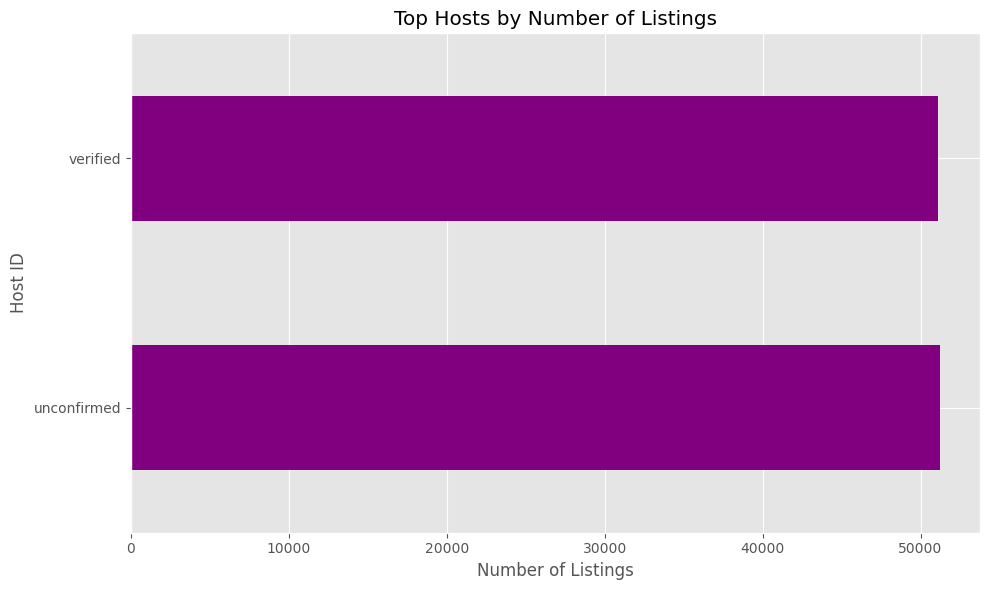

In [42]:
# Find host columns
host_id_col = None
host_name_col = None

for col in df.columns:
    if 'host' in col.lower() and 'id' in col.lower():
        host_id_col = col
    if 'host' in col.lower() and 'name' in col.lower():
        host_name_col = col

if host_id_col:
    top_hosts = df[host_id_col].value_counts().head(10)
    print("Top Hosts by Listing Count:")
    print(top_hosts)
    
    # Visualize
    plt.figure(figsize=(10, 6))
    top_hosts.plot(kind='barh', color='purple')
    plt.title('Top Hosts by Number of Listings')
    plt.xlabel('Number of Listings')
    plt.ylabel('Host ID')
    plt.tight_layout()
    plt.show()
else:
    print("Host ID column not found")

<a id="q6"></a>

---

## Question 6: Verified Hosts Analysis

### Research Question
**Are verified hosts more likely to receive positive reviews?**

---

### Analysis Method

| Step | Action |
|------|--------|
| **1. Find Columns** | Locate verification status and review score columns |
| **2. Group Data** | Group by verification status |
| **3. Calculate Average** | Compute mean review score for each group |
| **4. Compare** | Visualize difference between verified and non-verified |

---

### Expected Outcome

> **Hypothesis:** Verified hosts may have higher review scores due to:
> - Increased trust from guests
> - More professional service
> - Better accountability

---

In [41]:
# Find verification and review columns
verified_col = None
review_col = None

for col in df.columns:
    if 'verif' in col.lower() or 'identity' in col.lower():
        verified_col = col
    if 'review' in col.lower() and ('score' in col.lower() or 'rating' in col.lower()):
        review_col = col
        break

if verified_col and review_col:
    # Compare average reviews
    avg_reviews = df.groupby(verified_col)[review_col].mean()
    print("Average Review Score by Verification Status:")
    print(avg_reviews)
    
    # Visualize
    plt.figure(figsize=(8, 5))
    avg_reviews.plot(kind='bar', color=['red', 'green'])
    plt.title('Average Review Score: Verified vs Non-Verified Hosts')
    plt.xlabel('Verification Status')
    plt.ylabel('Average Review Score')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()
else:
    print("Verification or review column not found")

Verification or review column not found


<a id="q7"></a>

---

## Question 7: Price vs Service Fee Correlation

### Research Question
**Is there a correlation between price and service fee?**

---

### Analysis Steps

1. **Data Cleaning** - Remove $ and commas from both columns
2. **Type Conversion** - Convert to numeric format
3. **Remove Nulls** - Drop rows with missing values
4. **Scatter Plot** - Visualize relationship
5. **Calculate Correlation** - Compute Pearson coefficient

---

### Understanding the Results

| Correlation | Meaning | Business Implication |
|-------------|---------|---------------------|
| **High Positive** | Service fee increases with price | Percentage-based fee structure |
| **Low/None** | No clear relationship | Fixed or varied fee structure |

---

> **Expected:** Strong positive correlation if Airbnb uses percentage-based service fees.

---

In [50]:
print(df[[price_col, fee_col]])

         price  service fee
0        966.0        193.0
1        142.0         28.0
2        620.0        124.0
3        368.0         74.0
4        204.0         41.0
...        ...          ...
102594   844.0        169.0
102595   837.0        167.0
102596   988.0        198.0
102597   546.0        109.0
102598  1032.0        206.0

[102599 rows x 2 columns]


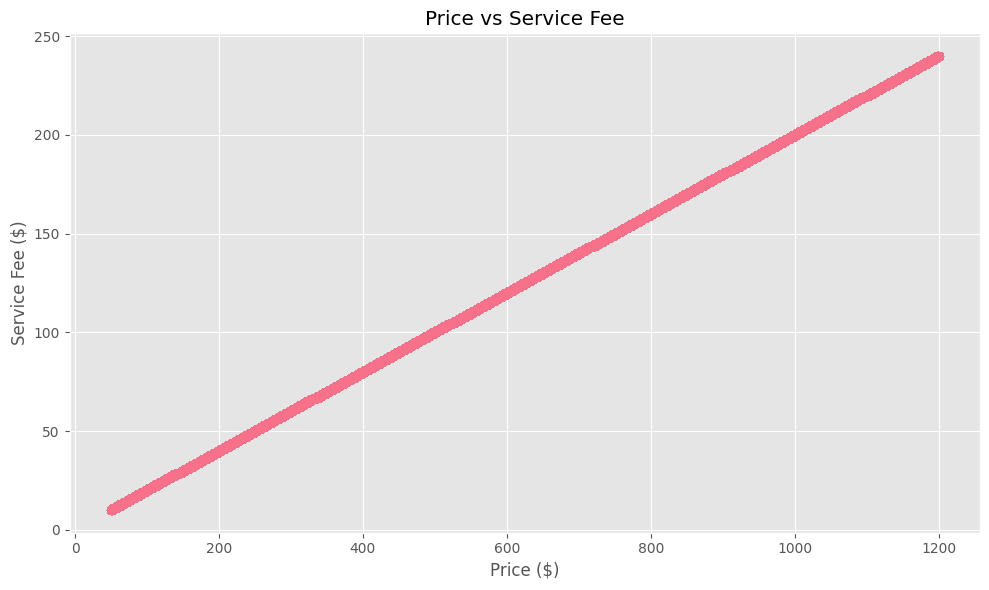

Correlation between price and service fee: 1.000


In [10]:
# Find service fee column
fee_col = None
for col in df.columns:
    if 'service' in col.lower() and 'fee' in col.lower():
        fee_col = col
        break

if price_col and fee_col:
    # Convert fee to numeric
    df[fee_col] = df[fee_col].astype(str).str.replace('$', '').str.replace(',', '')
    df[fee_col] = pd.to_numeric(df[fee_col], errors='coerce')
    
    # Remove missing values
    temp_df = df[[price_col, fee_col]].dropna()
    
    # Scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(temp_df[price_col], temp_df[fee_col], alpha=0.5)
    plt.title('Price vs Service Fee')
    plt.xlabel('Price ($)')
    plt.ylabel('Service Fee ($)')
    plt.tight_layout()
    plt.show()
    
    # Calculate correlation
    correlation = temp_df[price_col].corr(temp_df[fee_col])
    print(f"Correlation between price and service fee: {correlation:.3f}")
else:
    print("Price or service fee column not found")

<a id="q8"></a>

---

## Question 8: Review Rates Analysis

### Research Question
**What is the average review rate by neighbourhood and room type?**

---

### Analysis Technique

**Pivot Table Analysis**
- Rows: Neighborhoods
- Columns: Room types
- Values: Average review rate

---

### What We're Examining

> **Cross-Analysis**
> - How review rates vary by location
> - How property type affects reviews
> - Interaction between neighborhood and room type

---

### Visualization Strategy

- Focus on **top neighborhoods** for clarity
- Use **grouped bar chart** to compare room types
- Color-coded by property type for easy comparison

---

> **Insight:** This helps identify which neighborhood-room type combinations receive the best reviews.

---

Average Review Rate by Neighbourhood and Room Type:
room type                   Entire home/apt  Hotel room  Private room  \
neighbourhood                                                           
Allerton                          73.772727         NaN     42.377358   
Arden Heights                     18.000000         NaN      7.000000   
Arrochar                          34.464286         NaN     14.708333   
Arverne                           33.972414         NaN     36.189189   
Astoria                           27.399474         NaN     26.842254   
Bath Beach                        47.130435         NaN     21.680000   
Battery Park City                  6.702381         NaN      9.766667   
Bay Ridge                         40.018293         NaN     22.775194   
Bay Terrace                       77.000000         NaN     11.000000   
Bay Terrace, Staten Island         1.500000         NaN           NaN   

room type                   Shared room  
neighbourhood                

<Figure size 1200x600 with 0 Axes>

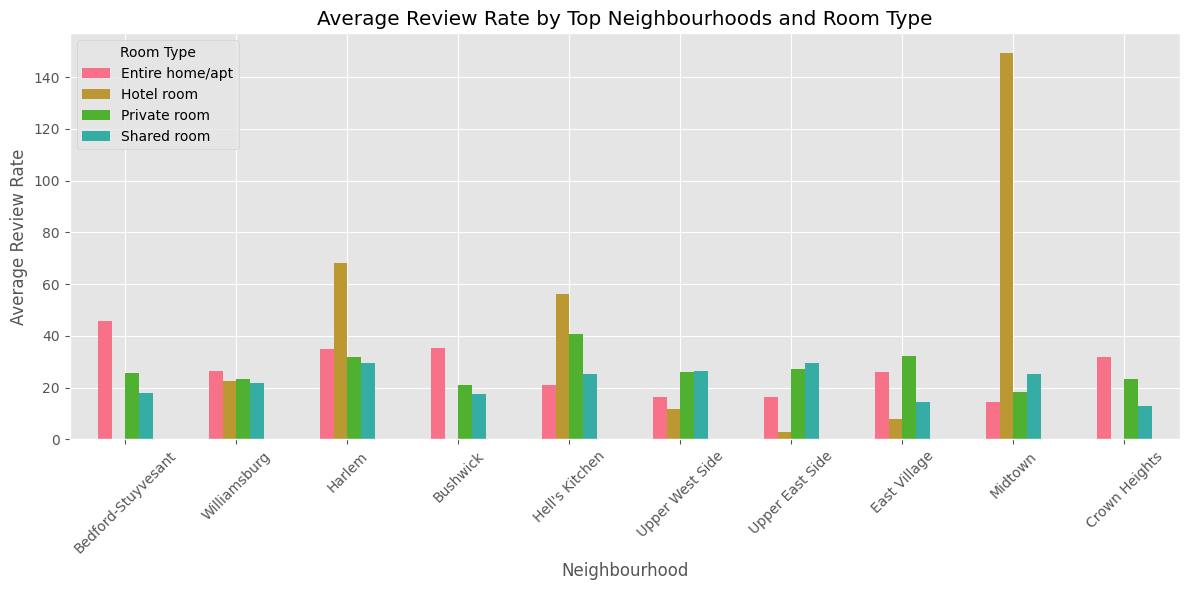

In [40]:
# Find review rate column
review_rate_col = None
for col in df.columns:
    if 'review' in col.lower() and ('rate' in col.lower() or 'number' in col.lower()):
        review_rate_col = col
        break

# Find neighborhood column
neigh_col = None
for col in df.columns:
    if 'neighbourhood' in col.lower() or 'neighborhood' in col.lower():
        if 'group' not in col.lower():  # Avoid "neighbourhood group"
            neigh_col = col
            break

# Find room type column
room_col = None
for col in df.columns:
    if 'room' in col.lower() and 'type' in col.lower():
        room_col = col
        break

if review_rate_col and neigh_col and room_col:
    # Create pivot table
    pivot_table = df.pivot_table(values=review_rate_col, 
                                   index=neigh_col, 
                                   columns=room_col, 
                                   aggfunc='mean')
    
    print("Average Review Rate by Neighbourhood and Room Type:")
    print(pivot_table.head(10))
    
    # Visualize top 10 neighborhoods
    top_neighborhoods = df[neigh_col].value_counts().head(10).index
    pivot_subset = pivot_table.loc[top_neighborhoods]
    
    plt.figure(figsize=(12, 6))
    pivot_subset.plot(kind='bar', figsize=(12, 6))
    plt.title('Average Review Rate by Top Neighbourhoods and Room Type')
    plt.xlabel('Neighbourhood')
    plt.ylabel('Average Review Rate')
    plt.legend(title='Room Type')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("Required columns not found")
    if not review_rate_col:
        print("  - Review rate column not found")
    if not neigh_col:
        print("  - Neighborhood column not found")
    if not room_col:
        print("  - Room type column not found")

<a id="q9"></a>

---

## Question 9: Host Availability Analysis

### Research Question
**Are hosts with more listings more available throughout the year?**

---

### Key Metrics

- **Availability 365** - Number of days per year a listing is available for booking
- **Host Listing Count** - Total number of properties managed by each host
- **Grouping** - Categorize hosts by number of listings (1, 2-5, 6-10, 11-50, 50+)

---

### Methodology

| Step | Process |
|------|---------|
| **1. Count Listings** | Calculate number of listings per host |
| **2. Map Values** | Add listing count to each row |
| **3. Clean Data** | Remove rows with missing availability |
| **4. Visualize** | Scatter plot: listing count vs availability |
| **5. Correlate** | Calculate correlation coefficient |
| **6. Group Analysis** | Compare availability across host size categories |

---

### Possible Outcomes

> **Positive Correlation** - Professional hosts with more properties maintain higher availability (better calendar management)
>
> **Negative Correlation** - More properties lead to decreased per-listing availability (spread too thin)
>
> **No Correlation** - Listing count doesn't affect availability (depends on individual host strategy)

---

Analyzing 98937 listings
,Number of unique hosts: 98424
,Listing count range: 1 to 2
,Availability range: 0 to 365 days


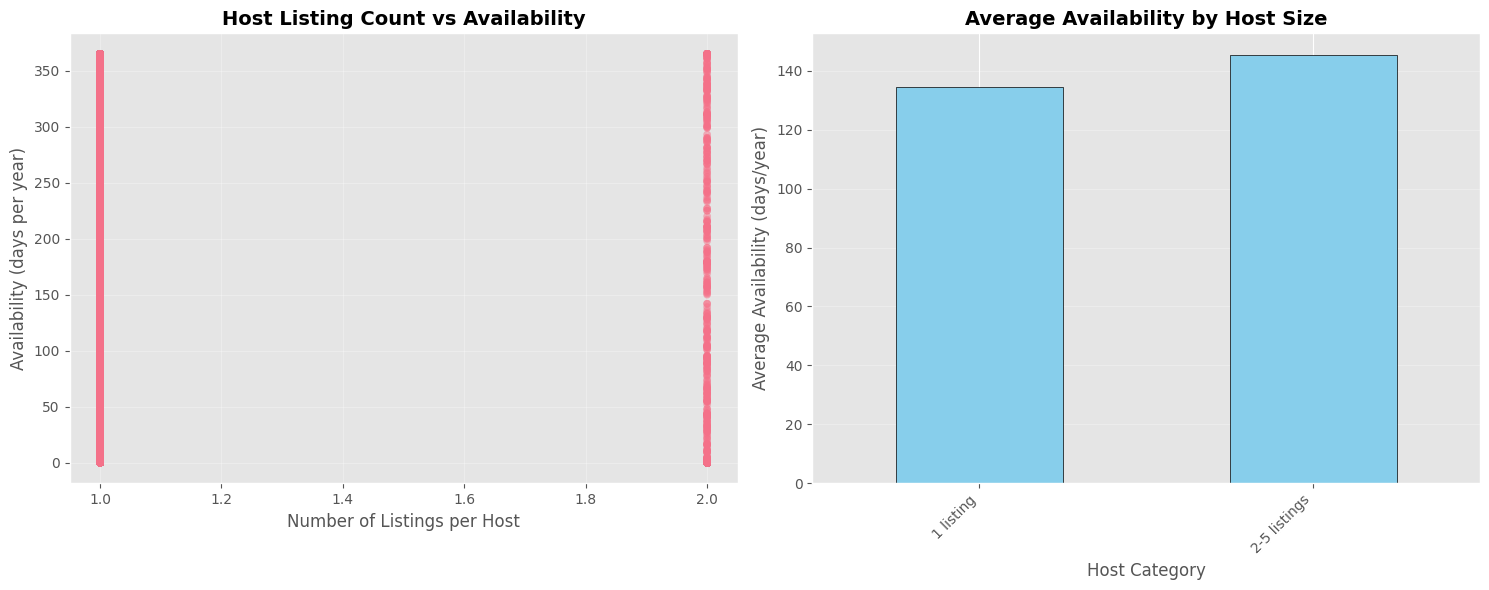


,Correlation between host listing count and availability: 0.009
,✓ Weak/No relationship: Listing count doesn't significantly affect availability
,  → Availability depends on other factors beyond number of properties
,
,Average Availability by Host Listing Count:
,  1 listing: 134.5 days/year (97,911 listings)
,  2-5 listings: 145.4 days/year (1,026 listings)


In [7]:
# Find host ID and availability columns
host_id_col = None
avail_col = None

for col in df.columns:
    if 'host' in col.lower() and 'id' in col.lower() and 'verified' not in col.lower():
        host_id_col = col
    if 'availab' in col.lower() and '365' in col.lower():
        avail_col = col

if host_id_col and avail_col:
    # Calculate listings per host
    host_listings = df[host_id_col].value_counts()
    temp_df = df[[host_id_col, avail_col]].copy()
    temp_df['host_listing_count'] = temp_df[host_id_col].map(host_listings)
    
    # Remove missing values
    temp_df = temp_df.dropna()
    
    # Convert availability to numeric if needed
    temp_df[avail_col] = pd.to_numeric(temp_df[avail_col], errors='coerce')
    temp_df = temp_df.dropna()
    
    # Filter valid availability (0-365 days per year)
    temp_df = temp_df[(temp_df[avail_col] >= 0) & (temp_df[avail_col] <= 365)]
    
    print(f"Analyzing {len(temp_df)} listings")
    print(f"Number of unique hosts: {temp_df[host_id_col].nunique()}")
    print(f"Listing count range: {temp_df['host_listing_count'].min():.0f} to {temp_df['host_listing_count'].max():.0f}")
    print(f"Availability range: {temp_df[avail_col].min():.0f} to {temp_df[avail_col].max():.0f} days")
    
    # Create figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Scatter plot
    ax1.scatter(temp_df['host_listing_count'], temp_df[avail_col], alpha=0.3, s=30, edgecolors='none')
    ax1.set_title('Host Listing Count vs Availability', fontsize=14, fontweight='bold')
    ax1.set_xlabel('Number of Listings per Host', fontsize=12)
    ax1.set_ylabel('Availability (days per year)', fontsize=12)
    ax1.grid(True, alpha=0.3)
    
    # Group analysis: Average availability by listing count groups
    temp_df['listing_group'] = pd.cut(temp_df['host_listing_count'], 
                                       bins=[0, 1, 5, 10, 50, 1000], 
                                       labels=['1 listing', '2-5 listings', '6-10 listings', '11-50 listings', '50+ listings'])
    
    group_avg = temp_df.groupby('listing_group', observed=True)[avail_col].mean()
    
    # Bar chart for grouped analysis
    group_avg.plot(kind='bar', ax=ax2, color='skyblue', edgecolor='black')
    ax2.set_title('Average Availability by Host Size', fontsize=14, fontweight='bold')
    ax2.set_xlabel('Host Category', fontsize=12)
    ax2.set_ylabel('Average Availability (days/year)', fontsize=12)
    ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')
    ax2.grid(True, alpha=0.3, axis='y')
    
    plt.tight_layout()
    plt.show()
    
    # Calculate correlation
    correlation = temp_df['host_listing_count'].corr(temp_df[avail_col])
    print(f"\nCorrelation between host listing count and availability: {correlation:.3f}")
    
    # Interpret the correlation
    if correlation > 0.3:
        print("✓ Positive relationship: Hosts with more listings tend to have higher availability")
        print("  → Professional hosts may manage their calendars more actively")
    elif correlation < -0.3:
        print("✓ Negative relationship: Hosts with more listings tend to have lower availability")
        print("  → Multiple listings may be harder to keep available year-round")
    else:
        print("✓ Weak/No relationship: Listing count doesn't significantly affect availability")
        print("  → Availability depends on other factors beyond number of properties")
    
    print(f"\nAverage Availability by Host Listing Count:")
    for group, avg_avail in group_avg.items():
        count = len(temp_df[temp_df['listing_group'] == group])
        print(f"  {group}: {avg_avail:.1f} days/year ({count:,} listings)")
else:
    print("Host ID or availability column not found")

<a id="summary"></a>

---

## Summary: Key Findings

---

## Analysis Overview

This comprehensive EDA explored **9 research questions** across multiple dimensions of Airbnb data.

---

### Research Areas Covered

| Category | Questions Answered |
|----------|-------------------|
| **Property Analysis** | • Distribution of property types<br>• Geographic distribution of listings |
| **Pricing Analysis** | • Average prices by neighborhood<br>• Price vs construction year relationship<br>• Price vs service fee correlation |
| **Host Analysis** | • Top hosts by listing count<br>• Verified vs non-verified host performance<br>• Listing count vs availability patterns |
| **Review Analysis** | • Review rates by neighborhood and room type |

---

### Technical Approach

> **Tools Used**
> - pandas for data manipulation
> - numpy for numerical operations
> - matplotlib for visualizations
> - seaborn for statistical plots
>
> **Techniques Applied**
> - Data cleaning and type conversion
> - Grouping and aggregation
> - Correlation analysis
> - Pivot table creation
> - Statistical summarization

---

### Made By :- Arpita Pandey

---